In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



In [31]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
try: 
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
except: 
  # Invalid device or cannot modify virtual devices once initialized. 
  pass 

In [4]:
data = pd.read_csv("data.txt", delimiter=' ', header=None, skiprows=1, names=['c1','c2','c3','c4','c5', 'c6'])
# data = pd.read_csv( 'data.txt' )
data.head()
# print(len(data))

c1     c2     c3     c4     c5      c6
0  47.88   8.39  49.29   6.31 -37.27  304.84
1  11.42 -46.21  -5.55 -15.94  25.05 -168.82
2  17.83   9.05  24.55 -42.49  37.12  196.37
3  41.77 -49.00 -42.52  37.32 -14.91 -296.75
4  34.34  -0.67  24.90  35.26  17.59   55.59

In [5]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

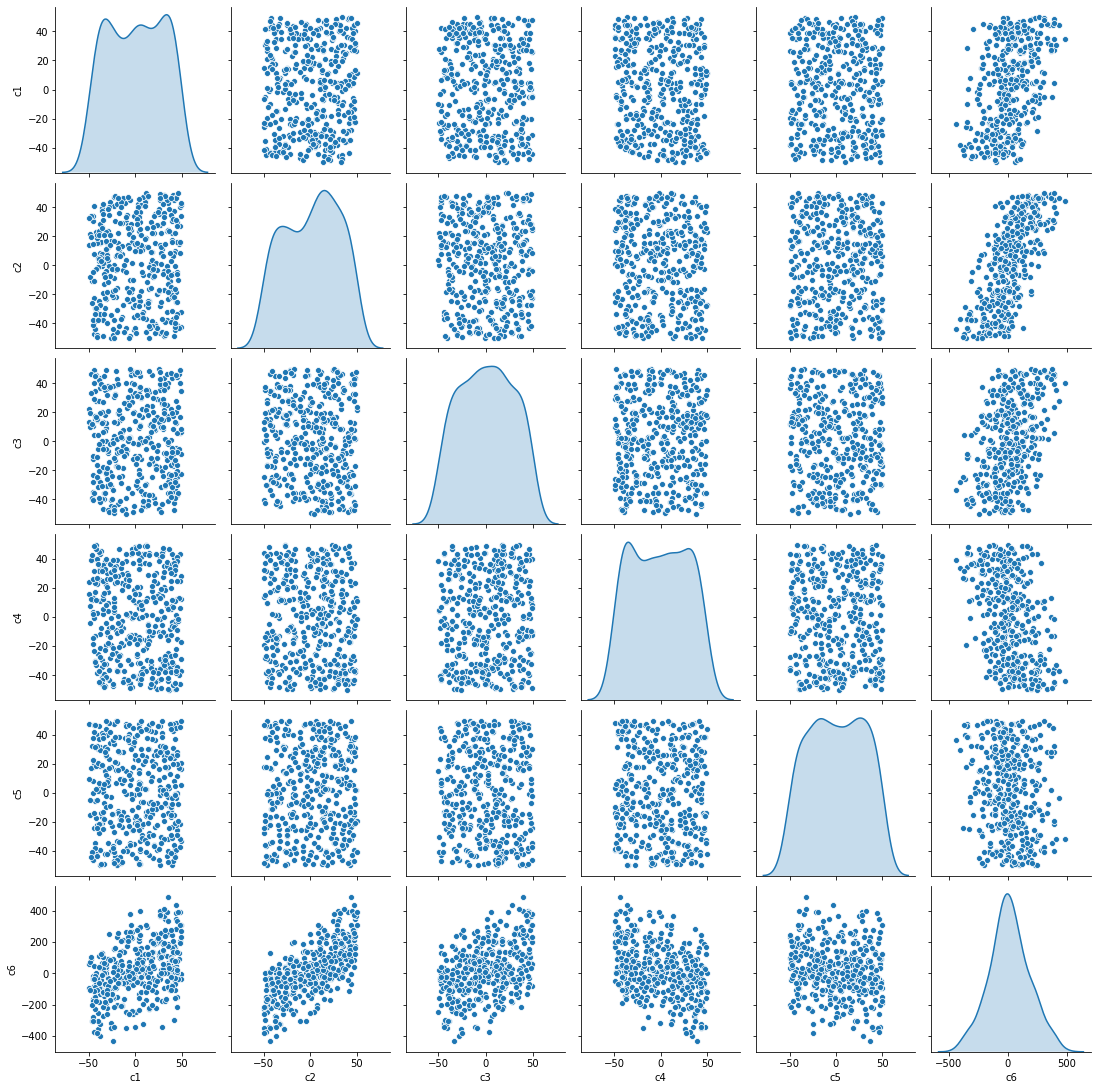

In [6]:
sns.pairplot(train_dataset[["c1", "c2", "c3", "c4", "c5", "c6"]], diag_kind="kde")

In [7]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

train_stats

count       mean         std     min     25%    50%       75%     max
c1  398.0   1.097789   29.510239  -49.82 -26.175  2.860   27.8825   49.53
c2  398.0   1.583266   29.109603  -49.99 -23.995  4.995   25.7900   49.85
c3  398.0   1.142915   28.069657  -49.91 -22.730  0.810   24.3975   49.81
c4  398.0  -1.241633   29.674994  -49.86 -29.410 -0.590   25.1350   49.48
c5  398.0   1.136432   29.586447  -49.97 -23.135  1.615   26.5500   49.96
c6  398.0  16.304221  168.390424 -434.27 -89.295  7.970  124.0325  489.87

In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [38]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(6)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)
    
# or could use adam optimizer
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 4,998
Trainable params: 4,998
Non-trainable params: 0
_________________________________________________________________


In [20]:
example_batch = normed_train_data
example_result = model.predict(example_batch)
example_result

array([[-0.19315782,  0.34478074,  0.3847602 , -0.25697124, -0.2323926 ,
         0.19290659],
       [-0.20584877,  0.35099968,  0.3671565 , -0.5993267 , -0.01490171,
        -0.06652555],
       [ 0.14516392,  0.2064746 ,  0.06379825, -0.18883374, -0.04626898,
        -0.19544524],
       ...,
       [ 0.33978444,  0.46431553,  0.34348723, -0.3739329 , -0.4802804 ,
        -0.064272  ],
       [ 0.06157258,  0.18297416,  0.12950745, -0.47853255, -0.24866772,
        -0.15579978],
       [-0.2481946 ,  0.36069787,  0.55458534, -0.7338375 , -0.3209775 ,
         0.32821542]], dtype=float32)

In [32]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_dataset,
  epochs=EPOCHS, validation_split = 0.2, 
  callbacks=[tfdocs.modeling.EpochDots()])

Train on 318 samples, validate on 80 samples
Epoch 1/1000
 32/318 [==>...........................] - ETA: 20s - loss: 6136.4189 - mae: 44.6536 - mse: 6136.4189
Epoch: 0, loss:5186.2919,  mae:42.3050,  mse:5186.2915,  val_loss:6415.3290,  val_mae:45.3539,  val_mse:6415.3291,  
318/318 [==============================] - 2s 8ms/sample - loss: 5186.2919 - mae: 42.3050 - mse: 5186.2915 - val_loss: 6415.3290 - val_mae: 45.3539 - val_mse: 6415.3291
Epoch 2/1000
318/318 [==============================] - 0s 229us/sample - loss: 5142.3093 - mae: 42.1184 - mse: 5142.3091 - val_loss: 6360.6206 - val_mae: 45.1497 - val_mse: 6360.6201
Epoch 3/1000
318/318 [==============================] - 0s 219us/sample - loss: 5092.6291 - mae: 41.9053 - mse: 5092.6294 - val_loss: 6292.0293 - val_mae: 44.8914 - val_mse: 6292.0293
Epoch 4/1000
318/318 [==============================] - 0s 215us/sample - loss: 5028.5762 - mae: 41.6346 - mse: 5028.5767 - val_loss: 6205.9619 - val_mae: 44.5686 - val_mse: 6205.9619
Ep

318/318 [==============================] - 0s 191us/sample - loss: 280.4308 - mae: 13.6930 - mse: 280.4308 - val_loss: 275.7173 - val_mae: 13.3856 - val_mse: 275.7173
Epoch 45/1000
318/318 [==============================] - 0s 179us/sample - loss: 261.4409 - mae: 13.2212 - mse: 261.4409 - val_loss: 259.6245 - val_mae: 12.9431 - val_mse: 259.6245
Epoch 46/1000
318/318 [==============================] - 0s 179us/sample - loss: 243.3949 - mae: 12.6937 - mse: 243.3949 - val_loss: 236.6141 - val_mae: 12.3716 - val_mse: 236.6141
Epoch 47/1000
318/318 [==============================] - 0s 213us/sample - loss: 224.1749 - mae: 12.1526 - mse: 224.1749 - val_loss: 217.0508 - val_mae: 11.8203 - val_mse: 217.0508
Epoch 48/1000
318/318 [==============================] - 0s 204us/sample - loss: 205.3939 - mae: 11.6159 - mse: 205.3939 - val_loss: 197.7005 - val_mae: 11.2723 - val_mse: 197.7005
Epoch 49/1000
318/318 [==============================] - 0s 201us/sample - loss: 187.1573 - mae: 11.0702 - ms

Epoch 91/1000
318/318 [==============================] - 0s 198us/sample - loss: 8.1509 - mae: 2.0392 - mse: 8.1509 - val_loss: 9.0943 - val_mae: 2.1685 - val_mse: 9.0943
Epoch 92/1000
318/318 [==============================] - 0s 186us/sample - loss: 7.7101 - mae: 2.0007 - mse: 7.7101 - val_loss: 8.9123 - val_mae: 2.1620 - val_mse: 8.9123
Epoch 93/1000
318/318 [==============================] - 0s 173us/sample - loss: 7.5353 - mae: 1.9798 - mse: 7.5353 - val_loss: 9.4707 - val_mae: 2.2412 - val_mse: 9.4707
Epoch 94/1000
318/318 [==============================] - 0s 185us/sample - loss: 7.4743 - mae: 1.9861 - mse: 7.4743 - val_loss: 8.4712 - val_mae: 2.1384 - val_mse: 8.4712
Epoch 95/1000
318/318 [==============================] - 0s 182us/sample - loss: 7.2296 - mae: 1.9422 - mse: 7.2296 - val_loss: 7.9990 - val_mae: 2.0671 - val_mse: 7.9990
Epoch 96/1000
318/318 [==============================] - 0s 188us/sample - loss: 6.9823 - mae: 1.9131 - mse: 6.9823 - val_loss: 8.1496 - val_mae:

318/318 [==============================] - 0s 207us/sample - loss: 3.4945 - mae: 1.3802 - mse: 3.4945 - val_loss: 3.9945 - val_mae: 1.5326 - val_mse: 3.9945
Epoch 138/1000
318/318 [==============================] - 0s 204us/sample - loss: 3.0505 - mae: 1.3113 - mse: 3.0505 - val_loss: 3.6016 - val_mae: 1.4575 - val_mse: 3.6016
Epoch 139/1000
318/318 [==============================] - 0s 203us/sample - loss: 3.0236 - mae: 1.2963 - mse: 3.0236 - val_loss: 4.1353 - val_mae: 1.5265 - val_mse: 4.1353
Epoch 140/1000
318/318 [==============================] - 0s 201us/sample - loss: 3.0781 - mae: 1.3079 - mse: 3.0781 - val_loss: 4.0179 - val_mae: 1.4946 - val_mse: 4.0179
Epoch 141/1000
318/318 [==============================] - 0s 194us/sample - loss: 2.9274 - mae: 1.2655 - mse: 2.9274 - val_loss: 3.6747 - val_mae: 1.4917 - val_mse: 3.6747
Epoch 142/1000
318/318 [==============================] - 0s 191us/sample - loss: 3.0048 - mae: 1.2958 - mse: 3.0048 - val_loss: 3.5507 - val_mae: 1.4435 -

318/318 [==============================] - 0s 177us/sample - loss: 1.8681 - mae: 1.0455 - mse: 1.8681 - val_loss: 2.6268 - val_mae: 1.2394 - val_mse: 2.6268
Epoch 185/1000
318/318 [==============================] - 0s 197us/sample - loss: 2.0120 - mae: 1.0809 - mse: 2.0120 - val_loss: 2.4129 - val_mae: 1.1875 - val_mse: 2.4129
Epoch 186/1000
318/318 [==============================] - 0s 185us/sample - loss: 1.8246 - mae: 1.0324 - mse: 1.8246 - val_loss: 2.6848 - val_mae: 1.2521 - val_mse: 2.6848
Epoch 187/1000
318/318 [==============================] - 0s 182us/sample - loss: 1.8111 - mae: 1.0273 - mse: 1.8111 - val_loss: 2.6808 - val_mae: 1.2522 - val_mse: 2.6808
Epoch 188/1000
318/318 [==============================] - 0s 178us/sample - loss: 2.0342 - mae: 1.0797 - mse: 2.0342 - val_loss: 2.7847 - val_mae: 1.2740 - val_mse: 2.7847
Epoch 189/1000
318/318 [==============================] - 0s 169us/sample - loss: 1.8531 - mae: 1.0270 - mse: 1.8531 - val_loss: 2.3775 - val_mae: 1.1933 -

318/318 [==============================] - 0s 179us/sample - loss: 1.4642 - mae: 0.9065 - mse: 1.4642 - val_loss: 2.3202 - val_mae: 1.1740 - val_mse: 2.3202
Epoch 231/1000
318/318 [==============================] - 0s 172us/sample - loss: 1.4585 - mae: 0.9397 - mse: 1.4585 - val_loss: 2.3286 - val_mae: 1.1601 - val_mse: 2.3286
Epoch 232/1000
318/318 [==============================] - 0s 173us/sample - loss: 1.4201 - mae: 0.9057 - mse: 1.4201 - val_loss: 2.2129 - val_mae: 1.1511 - val_mse: 2.2129
Epoch 233/1000
318/318 [==============================] - 0s 179us/sample - loss: 1.3911 - mae: 0.9116 - mse: 1.3911 - val_loss: 1.9861 - val_mae: 1.0678 - val_mse: 1.9861
Epoch 234/1000
318/318 [==============================] - 0s 172us/sample - loss: 1.4298 - mae: 0.9079 - mse: 1.4298 - val_loss: 1.9933 - val_mae: 1.0783 - val_mse: 1.9933
Epoch 235/1000
318/318 [==============================] - 0s 179us/sample - loss: 1.4090 - mae: 0.9188 - mse: 1.4090 - val_loss: 1.8806 - val_mae: 1.0330 -

Epoch 278/1000
318/318 [==============================] - 0s 210us/sample - loss: 0.8963 - mae: 0.7360 - mse: 0.8963 - val_loss: 1.8959 - val_mae: 1.0670 - val_mse: 1.8959
Epoch 279/1000
318/318 [==============================] - 0s 251us/sample - loss: 1.3790 - mae: 0.8852 - mse: 1.3790 - val_loss: 1.7256 - val_mae: 0.9919 - val_mse: 1.7256
Epoch 280/1000
318/318 [==============================] - 0s 144us/sample - loss: 0.9792 - mae: 0.7714 - mse: 0.9792 - val_loss: 1.6818 - val_mae: 0.9918 - val_mse: 1.6818
Epoch 281/1000
318/318 [==============================] - 0s 214us/sample - loss: 1.1831 - mae: 0.8392 - mse: 1.1831 - val_loss: 1.5998 - val_mae: 0.9726 - val_mse: 1.5998
Epoch 282/1000
318/318 [==============================] - 0s 296us/sample - loss: 0.9975 - mae: 0.7723 - mse: 0.9975 - val_loss: 1.7190 - val_mae: 1.0058 - val_mse: 1.7190
Epoch 283/1000
318/318 [==============================] - 0s 234us/sample - loss: 1.2429 - mae: 0.8325 - mse: 1.2429 - val_loss: 3.0540 - va

318/318 [==============================] - 0s 204us/sample - loss: 1.1919 - mae: 0.8227 - mse: 1.1919 - val_loss: 1.5663 - val_mae: 0.9652 - val_mse: 1.5663
Epoch 325/1000
318/318 [==============================] - 0s 182us/sample - loss: 0.7095 - mae: 0.6539 - mse: 0.7095 - val_loss: 1.4976 - val_mae: 0.9274 - val_mse: 1.4976
Epoch 326/1000
318/318 [==============================] - 0s 172us/sample - loss: 1.0752 - mae: 0.7840 - mse: 1.0752 - val_loss: 1.7058 - val_mae: 0.9893 - val_mse: 1.7058
Epoch 327/1000
318/318 [==============================] - 0s 126us/sample - loss: 1.0129 - mae: 0.7707 - mse: 1.0129 - val_loss: 1.6452 - val_mae: 0.9920 - val_mse: 1.6452
Epoch 328/1000
318/318 [==============================] - 0s 197us/sample - loss: 0.8774 - mae: 0.7329 - mse: 0.8774 - val_loss: 1.9821 - val_mae: 1.0204 - val_mse: 1.9821
Epoch 329/1000
318/318 [==============================] - 0s 168us/sample - loss: 1.0065 - mae: 0.7632 - mse: 1.0065 - val_loss: 2.0457 - val_mae: 1.0442 -

Epoch 372/1000
318/318 [==============================] - 0s 216us/sample - loss: 1.0377 - mae: 0.7705 - mse: 1.0377 - val_loss: 1.3628 - val_mae: 0.8788 - val_mse: 1.3628
Epoch 373/1000
318/318 [==============================] - 0s 222us/sample - loss: 0.7173 - mae: 0.6582 - mse: 0.7173 - val_loss: 1.3677 - val_mae: 0.8873 - val_mse: 1.3677
Epoch 374/1000
318/318 [==============================] - 0s 147us/sample - loss: 0.9511 - mae: 0.7396 - mse: 0.9511 - val_loss: 1.6359 - val_mae: 0.9647 - val_mse: 1.6359
Epoch 375/1000
318/318 [==============================] - 0s 198us/sample - loss: 0.9859 - mae: 0.7358 - mse: 0.9859 - val_loss: 1.3177 - val_mae: 0.8758 - val_mse: 1.3177
Epoch 376/1000
318/318 [==============================] - 0s 157us/sample - loss: 0.6791 - mae: 0.6585 - mse: 0.6791 - val_loss: 1.4119 - val_mae: 0.9143 - val_mse: 1.4119
Epoch 377/1000
318/318 [==============================] - 0s 197us/sample - loss: 0.9054 - mae: 0.7272 - mse: 0.9054 - val_loss: 1.4729 - va

318/318 [==============================] - 0s 203us/sample - loss: 0.7615 - mae: 0.6634 - mse: 0.7615 - val_loss: 1.3416 - val_mae: 0.8787 - val_mse: 1.3416
Epoch 419/1000
318/318 [==============================] - 0s 147us/sample - loss: 0.8633 - mae: 0.6980 - mse: 0.8633 - val_loss: 1.2753 - val_mae: 0.8455 - val_mse: 1.2753
Epoch 420/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.6846 - mae: 0.6480 - mse: 0.6846 - val_loss: 2.6745 - val_mae: 1.1616 - val_mse: 2.6745
Epoch 421/1000
318/318 [==============================] - 0s 177us/sample - loss: 0.8496 - mae: 0.6719 - mse: 0.8496 - val_loss: 1.1380 - val_mae: 0.7873 - val_mse: 1.1380
Epoch 422/1000
318/318 [==============================] - 0s 187us/sample - loss: 0.6880 - mae: 0.6430 - mse: 0.6880 - val_loss: 1.9297 - val_mae: 1.0018 - val_mse: 1.9297
Epoch 423/1000
318/318 [==============================] - 0s 231us/sample - loss: 0.8330 - mae: 0.6672 - mse: 0.8330 - val_loss: 1.3310 - val_mae: 0.8547 -

Epoch 466/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.7071 - mae: 0.6424 - mse: 0.7071 - val_loss: 1.1014 - val_mae: 0.7962 - val_mse: 1.1014
Epoch 467/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.8395 - mae: 0.6827 - mse: 0.8395 - val_loss: 1.1770 - val_mae: 0.7995 - val_mse: 1.1770
Epoch 468/1000
318/318 [==============================] - 0s 215us/sample - loss: 0.4594 - mae: 0.5335 - mse: 0.4594 - val_loss: 1.1030 - val_mae: 0.7910 - val_mse: 1.1030
Epoch 469/1000
318/318 [==============================] - 0s 146us/sample - loss: 0.8795 - mae: 0.6827 - mse: 0.8795 - val_loss: 1.2486 - val_mae: 0.8565 - val_mse: 1.2486
Epoch 470/1000
318/318 [==============================] - 0s 155us/sample - loss: 0.4994 - mae: 0.5531 - mse: 0.4994 - val_loss: 1.1426 - val_mae: 0.8212 - val_mse: 1.1426
Epoch 471/1000
318/318 [==============================] - 0s 160us/sample - loss: 0.7477 - mae: 0.6670 - mse: 0.7477 - val_loss: 1.2671 - va

318/318 [==============================] - 0s 171us/sample - loss: 0.5239 - mae: 0.5627 - mse: 0.5239 - val_loss: 1.5851 - val_mae: 0.8943 - val_mse: 1.5851
Epoch 513/1000
318/318 [==============================] - 0s 194us/sample - loss: 0.8161 - mae: 0.6626 - mse: 0.8161 - val_loss: 0.9969 - val_mae: 0.7382 - val_mse: 0.9969
Epoch 514/1000
318/318 [==============================] - 0s 147us/sample - loss: 0.6411 - mae: 0.5987 - mse: 0.6411 - val_loss: 1.3405 - val_mae: 0.8680 - val_mse: 1.3405
Epoch 515/1000
318/318 [==============================] - 0s 147us/sample - loss: 0.6117 - mae: 0.5923 - mse: 0.6117 - val_loss: 1.2203 - val_mae: 0.8618 - val_mse: 1.2203
Epoch 516/1000
318/318 [==============================] - 0s 203us/sample - loss: 0.6924 - mae: 0.6402 - mse: 0.6924 - val_loss: 1.2410 - val_mae: 0.8118 - val_mse: 1.2410
Epoch 517/1000
318/318 [==============================] - 0s 251us/sample - loss: 0.6864 - mae: 0.6201 - mse: 0.6864 - val_loss: 1.5172 - val_mae: 0.9090 -

Epoch 560/1000
318/318 [==============================] - 0s 142us/sample - loss: 0.6565 - mae: 0.5932 - mse: 0.6565 - val_loss: 0.9384 - val_mae: 0.7221 - val_mse: 0.9384
Epoch 561/1000
318/318 [==============================] - 0s 213us/sample - loss: 0.5310 - mae: 0.5535 - mse: 0.5310 - val_loss: 0.9144 - val_mae: 0.7171 - val_mse: 0.9144
Epoch 562/1000
318/318 [==============================] - 0s 195us/sample - loss: 0.5249 - mae: 0.5582 - mse: 0.5249 - val_loss: 1.7670 - val_mae: 0.9475 - val_mse: 1.7670
Epoch 563/1000
318/318 [==============================] - 0s 191us/sample - loss: 0.7442 - mae: 0.6186 - mse: 0.7442 - val_loss: 1.1996 - val_mae: 0.8243 - val_mse: 1.1996
Epoch 564/1000
318/318 [==============================] - 0s 191us/sample - loss: 0.5616 - mae: 0.5766 - mse: 0.5616 - val_loss: 0.9592 - val_mae: 0.7491 - val_mse: 0.9592
Epoch 565/1000
318/318 [==============================] - 0s 198us/sample - loss: 0.6901 - mae: 0.6148 - mse: 0.6901 - val_loss: 0.8802 - va

318/318 [==============================] - 0s 154us/sample - loss: 0.7110 - mae: 0.6256 - mse: 0.7110 - val_loss: 0.9428 - val_mae: 0.7076 - val_mse: 0.9428
Epoch 607/1000
318/318 [==============================] - 0s 203us/sample - loss: 0.5288 - mae: 0.5613 - mse: 0.5288 - val_loss: 1.1572 - val_mae: 0.8087 - val_mse: 1.1572
Epoch 608/1000
318/318 [==============================] - 0s 181us/sample - loss: 0.6329 - mae: 0.6125 - mse: 0.6329 - val_loss: 1.2280 - val_mae: 0.7971 - val_mse: 1.2280
Epoch 609/1000
318/318 [==============================] - 0s 179us/sample - loss: 0.6713 - mae: 0.6159 - mse: 0.6713 - val_loss: 0.9754 - val_mae: 0.7262 - val_mse: 0.9754
Epoch 610/1000
318/318 [==============================] - 0s 216us/sample - loss: 0.4480 - mae: 0.5311 - mse: 0.4480 - val_loss: 1.1684 - val_mae: 0.8404 - val_mse: 1.1684
Epoch 611/1000
318/318 [==============================] - 0s 182us/sample - loss: 0.6748 - mae: 0.5996 - mse: 0.6748 - val_loss: 1.0012 - val_mae: 0.7666 -

Epoch 654/1000
318/318 [==============================] - 0s 185us/sample - loss: 0.5871 - mae: 0.5844 - mse: 0.5871 - val_loss: 0.9283 - val_mae: 0.7161 - val_mse: 0.9283
Epoch 655/1000
318/318 [==============================] - 0s 202us/sample - loss: 0.6314 - mae: 0.6007 - mse: 0.6314 - val_loss: 0.9004 - val_mae: 0.6857 - val_mse: 0.9004
Epoch 656/1000
318/318 [==============================] - 0s 142us/sample - loss: 0.4402 - mae: 0.5007 - mse: 0.4402 - val_loss: 1.0153 - val_mae: 0.7427 - val_mse: 1.0153
Epoch 657/1000
318/318 [==============================] - 0s 185us/sample - loss: 0.7675 - mae: 0.6438 - mse: 0.7675 - val_loss: 0.7844 - val_mae: 0.6567 - val_mse: 0.7844
Epoch 658/1000
318/318 [==============================] - 0s 196us/sample - loss: 0.3684 - mae: 0.4835 - mse: 0.3684 - val_loss: 1.1385 - val_mae: 0.8204 - val_mse: 1.1385
Epoch 659/1000
318/318 [==============================] - 0s 143us/sample - loss: 0.6610 - mae: 0.6046 - mse: 0.6610 - val_loss: 0.9502 - va

Epoch 702/1000
318/318 [==============================] - 0s 197us/sample - loss: 0.4954 - mae: 0.5193 - mse: 0.4954 - val_loss: 1.0028 - val_mae: 0.7677 - val_mse: 1.0028
Epoch 703/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.5024 - mae: 0.5495 - mse: 0.5024 - val_loss: 1.9513 - val_mae: 0.9713 - val_mse: 1.9513
Epoch 704/1000
318/318 [==============================] - 0s 194us/sample - loss: 0.5331 - mae: 0.5444 - mse: 0.5331 - val_loss: 0.9402 - val_mae: 0.7224 - val_mse: 0.9402
Epoch 705/1000
318/318 [==============================] - 0s 159us/sample - loss: 0.6303 - mae: 0.5868 - mse: 0.6303 - val_loss: 0.9374 - val_mae: 0.7091 - val_mse: 0.9374
Epoch 706/1000
318/318 [==============================] - 0s 170us/sample - loss: 0.4863 - mae: 0.5299 - mse: 0.4863 - val_loss: 0.9649 - val_mae: 0.7532 - val_mse: 0.9649
Epoch 707/1000
318/318 [==============================] - 0s 291us/sample - loss: 0.5547 - mae: 0.5694 - mse: 0.5547 - val_loss: 1.1494 - va

Epoch 750/1000
318/318 [==============================] - 0s 207us/sample - loss: 0.5389 - mae: 0.5533 - mse: 0.5389 - val_loss: 0.7742 - val_mae: 0.6593 - val_mse: 0.7742
Epoch 751/1000
318/318 [==============================] - 0s 137us/sample - loss: 0.5832 - mae: 0.5474 - mse: 0.5832 - val_loss: 0.8167 - val_mae: 0.6660 - val_mse: 0.8167
Epoch 752/1000
318/318 [==============================] - 0s 165us/sample - loss: 0.3291 - mae: 0.4542 - mse: 0.3291 - val_loss: 1.0792 - val_mae: 0.7706 - val_mse: 1.0792
Epoch 753/1000
318/318 [==============================] - 0s 196us/sample - loss: 0.6246 - mae: 0.5845 - mse: 0.6246 - val_loss: 1.3944 - val_mae: 0.8857 - val_mse: 1.3944
Epoch 754/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.4900 - mae: 0.5358 - mse: 0.4900 - val_loss: 1.0763 - val_mae: 0.7444 - val_mse: 1.0763
Epoch 755/1000
318/318 [==============================] - 0s 215us/sample - loss: 0.5504 - mae: 0.5524 - mse: 0.5504 - val_loss: 1.1133 - va

318/318 [==============================] - 0s 168us/sample - loss: 0.5980 - mae: 0.5650 - mse: 0.5980 - val_loss: 1.0147 - val_mae: 0.7257 - val_mse: 1.0147
Epoch 798/1000
318/318 [==============================] - 0s 147us/sample - loss: 0.3366 - mae: 0.4398 - mse: 0.3366 - val_loss: 1.0213 - val_mae: 0.7799 - val_mse: 1.0213
Epoch 799/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.5549 - mae: 0.5662 - mse: 0.5549 - val_loss: 0.8384 - val_mae: 0.6828 - val_mse: 0.8384
Epoch 800/1000
318/318 [==============================] - 0s 197us/sample - loss: 0.5610 - mae: 0.5454 - mse: 0.5610 - val_loss: 0.9315 - val_mae: 0.7426 - val_mse: 0.9315
Epoch 801/1000
 32/318 [==>...........................] - ETA: 0s - loss: 0.5515 - mae: 0.5683 - mse: 0.5515
Epoch: 800, loss:0.4626,  mae:0.5270,  mse:0.4626,  val_loss:0.8522,  val_mae:0.6906,  val_mse:0.8522,  
318/318 [==============================] - 0s 168us/sample - loss: 0.4626 - mae: 0.5270 - mse: 0.4626 - val_loss:

318/318 [==============================] - 0s 168us/sample - loss: 0.5663 - mae: 0.5416 - mse: 0.5663 - val_loss: 1.5362 - val_mae: 0.9355 - val_mse: 1.5362
Epoch 844/1000
318/318 [==============================] - 0s 196us/sample - loss: 0.4772 - mae: 0.4878 - mse: 0.4772 - val_loss: 0.8535 - val_mae: 0.7015 - val_mse: 0.8535
Epoch 845/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.4357 - mae: 0.5005 - mse: 0.4357 - val_loss: 1.1743 - val_mae: 0.7614 - val_mse: 1.1743
Epoch 846/1000
318/318 [==============================] - 0s 147us/sample - loss: 0.5557 - mae: 0.5406 - mse: 0.5557 - val_loss: 0.7314 - val_mae: 0.6165 - val_mse: 0.7314
Epoch 847/1000
318/318 [==============================] - 0s 168us/sample - loss: 0.3602 - mae: 0.4702 - mse: 0.3602 - val_loss: 0.8085 - val_mae: 0.6740 - val_mse: 0.8085
Epoch 848/1000
318/318 [==============================] - 0s 217us/sample - loss: 0.6429 - mae: 0.5696 - mse: 0.6429 - val_loss: 0.7336 - val_mae: 0.6353 -

Epoch 891/1000
318/318 [==============================] - 0s 180us/sample - loss: 0.6872 - mae: 0.5797 - mse: 0.6872 - val_loss: 0.6343 - val_mae: 0.5882 - val_mse: 0.6343
Epoch 892/1000
318/318 [==============================] - 0s 191us/sample - loss: 0.4207 - mae: 0.4833 - mse: 0.4207 - val_loss: 0.9323 - val_mae: 0.7118 - val_mse: 0.9323
Epoch 893/1000
318/318 [==============================] - 0s 185us/sample - loss: 0.5275 - mae: 0.5233 - mse: 0.5275 - val_loss: 1.5831 - val_mae: 0.9295 - val_mse: 1.5831
Epoch 894/1000
318/318 [==============================] - 0s 178us/sample - loss: 0.4249 - mae: 0.4716 - mse: 0.4249 - val_loss: 0.6651 - val_mae: 0.5891 - val_mse: 0.6651
Epoch 895/1000
318/318 [==============================] - 0s 151us/sample - loss: 0.3509 - mae: 0.4711 - mse: 0.3509 - val_loss: 0.6326 - val_mae: 0.5796 - val_mse: 0.6326
Epoch 896/1000
318/318 [==============================] - 0s 196us/sample - loss: 0.6485 - mae: 0.5620 - mse: 0.6485 - val_loss: 1.1098 - va

318/318 [==============================] - 0s 201us/sample - loss: 0.3530 - mae: 0.4420 - mse: 0.3530 - val_loss: 0.9174 - val_mae: 0.7579 - val_mse: 0.9174
Epoch 938/1000
318/318 [==============================] - 0s 220us/sample - loss: 0.5856 - mae: 0.5806 - mse: 0.5856 - val_loss: 0.8655 - val_mae: 0.6597 - val_mse: 0.8655
Epoch 939/1000
318/318 [==============================] - 0s 254us/sample - loss: 0.4607 - mae: 0.5003 - mse: 0.4607 - val_loss: 1.1969 - val_mae: 0.8076 - val_mse: 1.1969
Epoch 940/1000
318/318 [==============================] - 0s 226us/sample - loss: 0.4533 - mae: 0.5080 - mse: 0.4533 - val_loss: 0.9993 - val_mae: 0.7227 - val_mse: 0.9993
Epoch 941/1000
318/318 [==============================] - 0s 182us/sample - loss: 0.4355 - mae: 0.5052 - mse: 0.4355 - val_loss: 0.6364 - val_mae: 0.5852 - val_mse: 0.6364
Epoch 942/1000
318/318 [==============================] - 0s 182us/sample - loss: 0.5430 - mae: 0.5310 - mse: 0.5430 - val_loss: 0.8606 - val_mae: 0.6840 -

Epoch 985/1000
318/318 [==============================] - 0s 181us/sample - loss: 0.2198 - mae: 0.3620 - mse: 0.2198 - val_loss: 1.0165 - val_mae: 0.7538 - val_mse: 1.0165
Epoch 986/1000
318/318 [==============================] - 0s 178us/sample - loss: 0.5282 - mae: 0.5339 - mse: 0.5282 - val_loss: 0.6418 - val_mae: 0.5880 - val_mse: 0.6418
Epoch 987/1000
318/318 [==============================] - 0s 202us/sample - loss: 0.3401 - mae: 0.4553 - mse: 0.3401 - val_loss: 1.1519 - val_mae: 0.7210 - val_mse: 1.1519
Epoch 988/1000
318/318 [==============================] - 0s 176us/sample - loss: 0.5162 - mae: 0.5239 - mse: 0.5162 - val_loss: 1.3934 - val_mae: 0.8737 - val_mse: 1.3934
Epoch 989/1000
318/318 [==============================] - 0s 205us/sample - loss: 0.4733 - mae: 0.5004 - mse: 0.4733 - val_loss: 1.1004 - val_mae: 0.7255 - val_mse: 1.1004
Epoch 990/1000
318/318 [==============================] - 0s 198us/sample - loss: 0.3002 - mae: 0.4308 - mse: 0.3002 - val_loss: 0.8008 - va

In [33]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

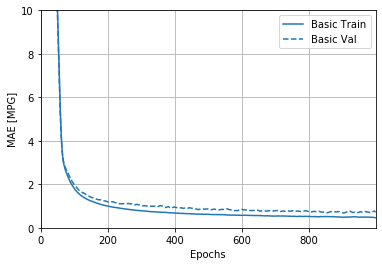

In [34]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [35]:
loss, mae, mse = model.evaluate(normed_test_data, test_dataset, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

99/99 - 1s - loss: 0.5391 - mae: 0.5369 - mse: 0.5391
Testing set Mean Abs Error:  0.54 MPG


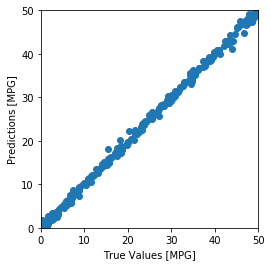

In [36]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_dataset, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
